**Assignment - 1 set 5**

Question No.2.

Dataset :  data2_0.75_6.csv

Problem Type : classification


sub-q : Train two single/double hidden layer deep networks by varying the number of hidden nodes (4, 8, 12, 16) in each layer with 70% training and 30% validation data. Use appropriate learning rate, activation, and loss functions and also mention the reason for choosing the same. Report, compare, and explain the observed accuracy and minimum loss achieved.*italicised text*

In [1]:
#importing the required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import keras 
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from google.colab import drive
import os
from keras.models import Sequential
from keras.layers import Dense,LeakyReLU,PReLU,ELU,Dropout
#importing the datasets;

drive.mount('/content/gdrive/', force_remount=True)
%cd gdrive/MyDrive
%cd /content/gdrive/MyDrive/
directory = os.getcwd()


Mounted at /content/gdrive/
/content/gdrive/MyDrive
/content/gdrive/MyDrive


Reading the CSV file, and assigning the proper column names.

In [2]:
colnames=['X','Y','Target']
data=pd.read_csv('data2_0.75_6.csv',sep=",",names=colnames, header=None)

Displaying the rows to check if data is read correctly

In [3]:
print(data.head(5))
print(data.tail(5))

          X         Y  Target
0  0.156327  0.011857       0
1  0.211109  0.032209       0
2  0.263386  0.060866       0
3  0.312221  0.097541       0
4  0.356707  0.141855       0
             X             Y  Target
493 -13.181762  4.118132e+00       1
494 -13.510777  3.122201e+00       1
495 -13.764337  2.100020e+00       1
496 -13.940352  1.057319e+00       1
497  15.607963 -1.146300e-12       1


After transformation splitting the data in feature and target sets for further processing

In [4]:
dataX=data.iloc[:,0:2]
dataY=data.iloc[:,2]

Splitting the data in Train and Test Sets 

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(dataX,dataY,test_size=0.3,random_state=2)

Scaling the Input features using standard scaler

In [6]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


Checking the Shape of Train,Test and Features and Target Variable Y

In [7]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(348, 2)
(348,)
(150, 2)
(150,)


Defining the model running various iterations to check the results.

Reasons are as follows:
Adam Optimizer: The results of the Adam optimizer are generally better than every other optimization algorithms, have faster computation time, and require fewer parameters for tuning. Because of all that, Adam is recommended as the default optimizer for most of the applications. In this case, Adam optimizer provided better accuracy than other optimization algorithms (e.g. sgd)

Learning Rate 0.03: The default learning rate for Adam optimizer is 0.001. However, this was causing the model to converge slowly. Therefore, the learning rate was adjusted to 0.03 after a few trials so that the model converged in less than 250 epochs.

Activation function: ReLu was preferred over sigmoid, softmax, and tanh. Multiple combinations of these activation functions were tried (e.g. hidden layer1 = sigmoid, hidden layer2 = tanh etc) and it was concluded that ReLu performed the best for this problem. Moreover, ReLu is more computationally efficient to compute than Sigmoid like functions since Relu just needs to pick max(0, x) and not perform expensive exponential operations as in Sigmoids. Therefore, in practice, networks with Relu tend to show better convergence performance than sigmoid.

Loss function: binary_crossentropy was used as a loss function because binary classification model was to be evaluated. The binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.

metrics: Accuracy is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance. In this problem, both the classes in target variable were equally represented. Therefore, accuracy metrics was used.

Specifying different set's of input classifiers with different internal nodes, for looping and comparing the best results

In [8]:

bits_classifiers = {
    'classifier-4-8' : {
        'name': 'Sequential',
        'layers':[{'name': 'layer1','units': 4,'activation': 'ReLu'},{'name': 'layer2','units': 8,'activation': 'ReLu'}]
    },
    'classifier-8-12' : {
        'name': 'Sequential',
        'layers':[{'name': 'layer1','units': 8,'activation': 'ReLu'},{'name': 'layer2','units': 12,'activation': 'ReLu'}]
    },
    'classifier-12-16' : {
        'name': 'Sequential',
        'layers':[{'name': 'layer1','units': 12,'activation': 'ReLu'},{'name': 'layer2','units': 16,'activation': 'ReLu'}]
    }
}


for bits_classifier, classifier_details in bits_classifiers.items():
  if classifier_details.get('name') == 'Sequential':
    classifier = Sequential()
    for layer in classifier_details.get('layers'):
      classifier.add(Dense(
          units=layer.get('units'),
          kernel_initializer='he_normal',
          activation='ReLU',
          input_dim=2 if layer.get('name') == 'layer1' else None
      ))
    classifier.add(Dense(units=1,activation='sigmoid'))
    opt=Adam(learning_rate=0.03)
    classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
    classifier_details['classifier'] = classifier

for bits_classifier, classifier_details in bits_classifiers.items():
  print(f"classifier_name = {bits_classifier}")
  classifier_details.get('classifier').summary()


classifier_name = classifier-4-8
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 8)                 40        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
classifier_name = classifier-8-12
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 8)                 24        
                                     

Fitting the generated the models one by one on the Training Dataset.

In [9]:
list_models = []

for bits_classifier, classifier_details in bits_classifiers.items():
  print(f"========Classifier fit for - {bits_classifier}=========")
  classifier_details['model_detail'] = classifier_details.get('classifier').fit(x=X_train, 
            y=Y_train, 
            epochs=250,
            batch_size=16,
            validation_data=(X_test, Y_test),
            verbose=1
          )

========Classifier fit for - classifier-4-8=========
Epoch 1/250
22/22 [==============================] - 2s 19ms/step - loss: 0.7586 - accuracy: 0.5316 - val_loss: 0.7068 - val_accuracy: 0.4667
Epoch 2/250
22/22 [==============================] - 0s 6ms/step - loss: 0.6983 - accuracy: 0.5230 - val_loss: 0.6865 - val_accuracy: 0.5733
Epoch 3/250
22/22 [==============================] - 0s 7ms/step - loss: 0.6873 - accuracy: 0.5431 - val_loss: 0.6944 - val_accuracy: 0.5267
Epoch 4/250
22/22 [==============================] - 0s 7ms/step - loss: 0.6862 - accuracy: 0.5431 - val_loss: 0.6844 - val_accuracy: 0.5533
Epoch 5/250
22/22 [==============================] - 0s 6ms/step - loss: 0.6860 - accuracy: 0.5632 - val_loss: 0.6855 - val_accuracy: 0.5533
Epoch 6/250
22/22 [==============================] - 0s 5ms/step - loss: 0.6840 - accuracy: 0.5690 - val_loss: 0.6881 - val_accuracy: 0.5533
Epoch 7/250
22/22 [==============================] - 0s 7ms/step - loss: 0.6914 - accuracy: 0.5575 -

Comparing the Models

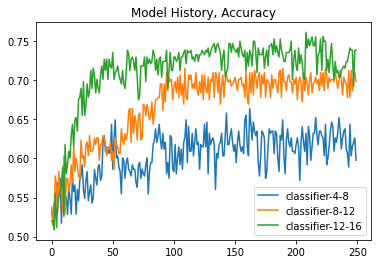

In [10]:
for bits_classifier, classifier_details in bits_classifiers.items():
  plt.plot(classifier_details.get('model_detail').history['accuracy'], label=bits_classifier)
  
plt.title("Model History, Accuracy")
plt.legend()
plt.show()


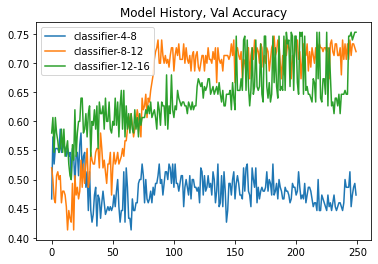

In [11]:
for bits_classifier, classifier_details in bits_classifiers.items():
  plt.plot(classifier_details.get('model_detail').history['val_accuracy'], label=bits_classifier)

plt.title("Model History, Val Accuracy")
plt.legend()
plt.show()

In [12]:
losses = []
for bits_classifier, classifier_details in bits_classifiers.items():
  print(f"classifier_name = {bits_classifier}")
  classifier_losses = pd.DataFrame(classifier_details.get('classifier').history.history)
  print(classifier_losses)
  losses.append(classifier_losses)
# losses

classifier_name = classifier-4-8
         loss  accuracy  val_loss  val_accuracy
0    0.758607  0.531609  0.706799      0.466667
1    0.698333  0.522988  0.686466      0.573333
2    0.687296  0.543103  0.694435      0.526667
3    0.686235  0.543103  0.684353      0.553333
4    0.685953  0.563218  0.685549      0.553333
..        ...       ...       ...           ...
245  0.635586  0.603448  0.716897      0.453333
246  0.619960  0.614943  0.741505      0.473333
247  0.624314  0.620690  0.717157      0.486667
248  0.617646  0.626437  0.740868      0.493333
249  0.625997  0.597701  0.721848      0.473333

[250 rows x 4 columns]
classifier_name = classifier-8-12
         loss  accuracy  val_loss  val_accuracy
0    0.726713  0.537356  0.691804      0.520000
1    0.704451  0.514368  0.689159      0.500000
2    0.691393  0.534483  0.698589      0.466667
3    0.686904  0.577586  0.695820      0.460000
4    0.692092  0.566092  0.702884      0.506667
..        ...       ...       ...           .

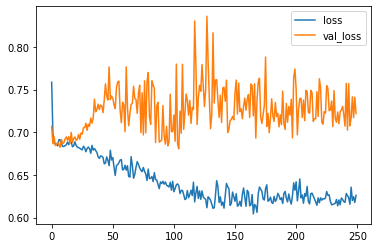

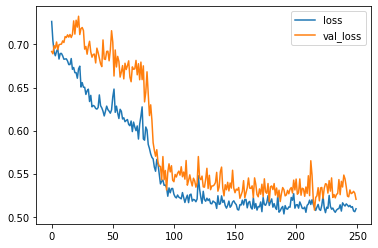

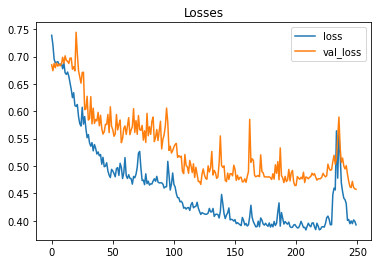

In [13]:
for loss in losses:
  loss[['loss','val_loss']].plot()
plt.title("Losses")
plt.show()

Generating the Confusion matrix and classification report for all the classifiers specified.

In [14]:
# list_predictions = []
# for classifier in list_classifiers:
#   y_pred = (classifier.predict(X_test) > 0.5).astype("int32")
#   list_predictions.append(y_pred)

from sklearn.metrics import classification_report, confusion_matrix


for bits_classifier, classifier_details in bits_classifiers.items():
  prediction = (classifier_details.get('classifier').predict(X_test) > 0.5).astype("int32")
  print(f"Prediction report for classifier = {bits_classifier}")
  print(classification_report(Y_test, prediction))
  print(f"Confusion Matrix for classifier = {bits_classifier}")
  print(pd.DataFrame(confusion_matrix(Y_test, prediction)))
  print("------------------------------------------------")


Prediction report for classifier = classifier-4-8
              precision    recall  f1-score   support

           0       0.46      0.67      0.54        70
           1       0.51      0.30      0.38        80

    accuracy                           0.47       150
   macro avg       0.48      0.49      0.46       150
weighted avg       0.49      0.47      0.46       150

Confusion Matrix for classifier = classifier-4-8
    0   1
0  47  23
1  56  24
------------------------------------------------
Prediction report for classifier = classifier-8-12
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        70
           1       0.70      0.82      0.76        80

    accuracy                           0.72       150
   macro avg       0.73      0.71      0.71       150
weighted avg       0.72      0.72      0.72       150

Confusion Matrix for classifier = classifier-8-12
    0   1
0  42  28
1  14  66
-------------------------------------

In [15]:
for bits_classifier, classifier_details in bits_classifiers.items():
  classifier_details['accuracy'] = round(classifier_details.get('classifier').evaluate(X_test,Y_test)[1]*100, 2)
  classifier_details['loss'] = round(classifier_details.get('classifier').evaluate(X_test,Y_test)[0], 2)



5/5 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.7533


In [16]:
for bits_classifier, classifier_details in bits_classifiers.items():
  print(f"For classifier = {bits_classifier}, accuracy - {classifier_details.get('accuracy')} and loss - {classifier_details.get('accuracy')}")

For classifier = classifier-4-8, accuracy - 47.33 and loss - 47.33
For classifier = classifier-8-12, accuracy - 72.0 and loss - 72.0
For classifier = classifier-12-16, accuracy - 75.33 and loss - 75.33


Explanation for the above results:


While comparing all the three classifier's given above it is observed that classifier with 2 hiden layers having (8,12) hidden inputs respecitvely gives the best result,

Accuracy is the highest observed for this in both Training and Validation set,Loss is also similar to the Training loss which tells us that our model is not overifitng the given data.

Therefore, as per above analysis 12 nodes in first and 16 in second hidden layer gives us better results when compared to others.

### Q2 Sub Ques- 3

Q: Visually observe the dataset and design an appropriate feature transformation (derived feature) such that after feature transformation, the dataset can be classified using a minimal network architecture (minimum number of parameters). Design, train this minimal network, and report training and validation errors, and trained parameters of the network. Use 70% training and 30% validation data, appropriate learning rate, activation and loss functions. Explain the final results




Explaination of the model created:

when we intially created the model, as a sub part 2 of Q2 initally it did'nt give good results for single hidden layers with increasing the units of hidden nodes, value was slightly for accuracy but started reducing after one point of time.
As per the part of this question we started testing various input derived features that can be tested for this, initially we started with squaring the values, then taking square root of the features, even we tried with multiplying the both input features but the value with only single hidden layer with 6 input units didnt gave us good results.
As a part of experimentation we tried taking the sin of the input features and supplied it in the model along with the exisitng input class, Later as a start we had 6  nodes in the node, which was later increased to 7 ,8, 10 but the accuracy and loss was not significantally changing, As a part of the question minimal network was to be defined, as the accuracy was not much increasing with increasing the nodes, so we tried reducing the nodes as well, while reducing the nodes, after reducing the nodes less than 5 the value of accuracy started decreasing. 
fixed


Visuallizing observe the dataset, dataset seems to be a complex one, spiral in nature which is not at all linearly separable.

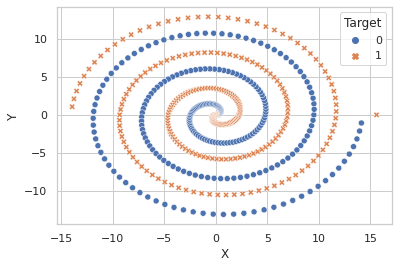

In [17]:
sns.set(style='whitegrid')
sns.scatterplot(x="X",
                    y="Y",
                    style="Target",
                    hue="Target",
                    data=data)

Deriving a feature i.e. sin of the input feature1 and feature2, other transformations also possible but the sin function gives the better results when compared to other features, main reason may be it scales down the input between -1 to 1 

In [18]:
data_Transformed=data
def sinfunc(x):
    return np.sin(x)
data_Transformed['SinX'] = data_Transformed['X'].apply(sinfunc)
data_Transformed['SinY'] = data_Transformed['Y'].apply(sinfunc)
print(data_Transformed)


             X             Y  Target      SinX          SinY
0     0.156327  1.185676e-02       0  0.155691  1.185648e-02
1     0.211109  3.220876e-02       0  0.209544  3.220319e-02
2     0.263386  6.086580e-02       0  0.260351  6.082823e-02
3     0.312221  9.754146e-02       0  0.307173  9.738686e-02
4     0.356707  1.418555e-01       0  0.349191  1.413802e-01
..         ...           ...     ...       ...           ...
493 -13.181762  4.118132e+00       1 -0.577278 -8.285648e-01
494 -13.510777  3.122201e+00       1 -0.810149  1.939012e-02
495 -13.764337  2.100020e+00       1 -0.931300  8.631995e-01
496 -13.940352  1.057319e+00       1 -0.980694  8.710419e-01
497  15.607963 -1.146300e-12       1  0.099833 -1.146300e-12

[498 rows x 5 columns]


After transformation splitting the data in feature and target sets for further processing

In [19]:
TransX=data_Transformed[["X", "Y","SinX","SinY"]]
TransY=data_Transformed[["Target"]]

Splitting the data in Train and Test Sets 

In [20]:
X_TRtrain,X_TRtest,Y_TRtrain,Y_TRtest=train_test_split(TransX,TransY,test_size=0.3,random_state=2)
print(X_TRtrain.shape)
print(Y_TRtrain.shape)
print(X_TRtest.shape)
print(Y_TRtest.shape)


(348, 4)
(348, 1)
(150, 4)
(150, 1)


Building a Neural network model which requires minimum no. of input parameters
Adam being the best optimizer is used in the model, with only one hidden layer and only 5 hidden units.
Output layer consists of 1 output sigmoid function is used Tanh can also be used.

Activation function: ReLu was preferred over sigmoid, softmax, and tanh. Multiple combinations of these activation functions were tried (e.g. hidden layer1 = sigmoid, hidden layer2 = tanh etc) and it was concluded that ReLu performed the best for this problem

Loss function: binary_crossentropy was used as a loss function because binary classification model was to be evaluated

metrics: Accuracy is a metric that generally describes how the model performs across all classes. It is useful when all classes are of equal importance.

In [21]:
classifier=Sequential()
classifier.add(Dense(units=5,kernel_initializer='he_normal',activation='ReLU',input_dim=4))
classifier.add(Dense(units=1,activation='sigmoid'))
opt=Adam(learning_rate=0.03)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 5)                 25        
                                                                 
 dense_10 (Dense)            (None, 1)                 6         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


Fititng the Given model with appropriate batch_size, epochs.

In [22]:
model_history=classifier.fit(X_TRtrain, Y_TRtrain,validation_split=0.33, batch_size=45, epochs=400)

Epoch 1/400
6/6 [==============================] - 1s 36ms/step - loss: 1.9806 - accuracy: 0.5107 - val_loss: 1.0992 - val_accuracy: 0.4174
Epoch 2/400
6/6 [==============================] - 0s 10ms/step - loss: 1.0020 - accuracy: 0.4635 - val_loss: 0.6850 - val_accuracy: 0.6000
Epoch 3/400
6/6 [==============================] - 0s 7ms/step - loss: 0.7600 - accuracy: 0.5322 - val_loss: 0.7256 - val_accuracy: 0.6261
Epoch 4/400
6/6 [==============================] - 0s 7ms/step - loss: 0.8025 - accuracy: 0.5451 - val_loss: 0.7064 - val_accuracy: 0.6087
Epoch 5/400
6/6 [==============================] - 0s 12ms/step - loss: 0.7362 - accuracy: 0.5408 - val_loss: 0.6770 - val_accuracy: 0.5478
Epoch 6/400
6/6 [==============================] - 0s 7ms/step - loss: 0.6935 - accuracy: 0.5622 - val_loss: 0.6792 - val_accuracy: 0.5739
Epoch 7/400
6/6 [==============================] - 0s 10ms/step - loss: 0.6921 - accuracy: 0.5579 - val_loss: 0.6839 - val_accuracy: 0.5391
Epoch 8/400
6/6 [======

Summary plot of the Training Accuracy obtained

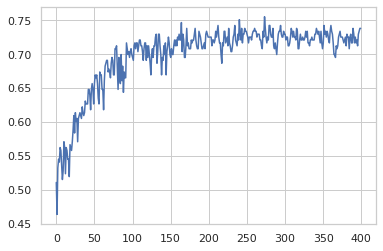

In [23]:
plt.plot(model_history.history['accuracy'])

Summary plot of the Validation Accuracy obtained

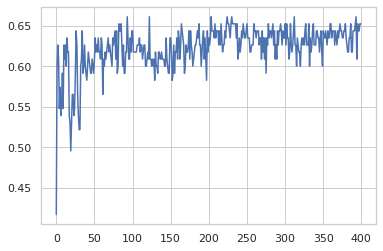

In [24]:
plt.plot(model_history.history['val_accuracy'])

Summary of Accuracy and loss with the training dataset.

In [25]:
print("Accuracy of the model is - " , classifier.evaluate(X_TRtest,Y_TRtest)[1]*100 , "%")
print("Loss of the model is - " , classifier.evaluate(X_TRtest,Y_TRtest)[0])


5/5 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6533
Accuracy of the model is -  65.3333306312561 %
5/5 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.6533
Loss of the model is -  0.6560877561569214


Epoch vs Accruacy and Loss plot is displayed for better undertanding.

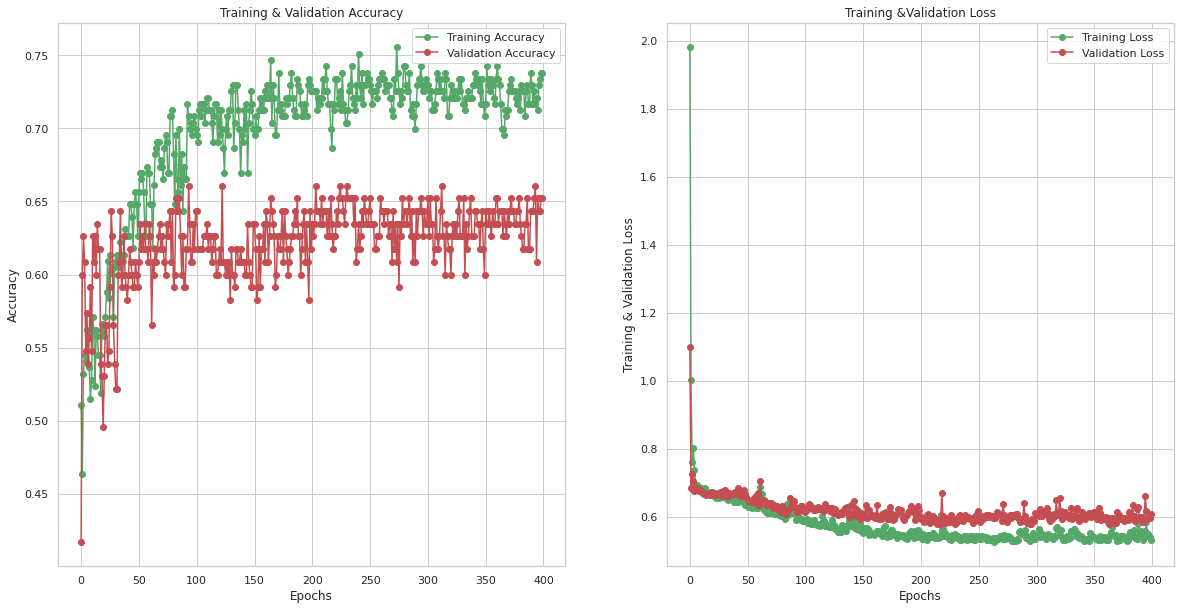

In [26]:
epochs = [i for i in range(400)]
fig , ax = plt.subplots(1,2)
train_acc = model_history.history['accuracy']
train_loss = model_history.history['loss']
val_acc = model_history.history['val_accuracy']
val_loss = model_history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Validation Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Validation Loss')
ax[1].set_title('Training &Validation Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Training & Validation Loss")
plt.show()

Since, the accuracy results seem to be satisfactory, predicting result for the Testing dataset and transforming the results. in 0 & 1

In [27]:

predicted = classifier.predict(X_TRtest)
predicted_Res = [0 if i<0.5 else 1 for i in predicted]

Classification report produced for the Model on Test data



In [28]:

print(classification_report(Y_test, predicted_Res))

              precision    recall  f1-score   support

           0       0.70      0.46      0.55        70
           1       0.63      0.82      0.72        80

    accuracy                           0.65       150
   macro avg       0.67      0.64      0.63       150
weighted avg       0.66      0.65      0.64       150



Confusion matrix for the Model on Test data



0.6533333333333333
[[32 38]
 [14 66]]


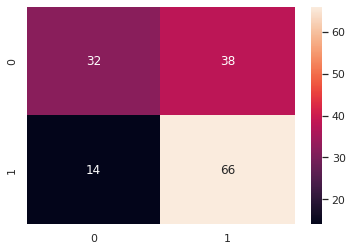

In [29]:
print(accuracy_score(Y_test, predicted_Res))
cm_ann = confusion_matrix(Y_test, predicted_Res)
sns.heatmap(cm_ann, annot=True) ;
print(cm_ann)

Explanation of the results. (necessary explanation qiven at every step)

As a part of experementing, initially our assumptions was with increasing the number of hidden nodes makes the model more stronger, but with that it also makes the model more complex.
If we see the results for this Loss in significantally decreased over the epochs as well as the accuracy is increasing with time. Results might not be very compelling but with minimal architecute it can be considered satisfactory. Choice of activation function, loss functions are explained above.

Confusion metrics shows us that some part of testing data is wrongly clasified which can be made better with increasing trainnig time or inputing more data in the system.
Accuracy obtained is more than 60% for both training and test casing, making a proper trade off in bias and variance.